In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Validated_Graduate_Dataset.csv")
df.head()

,applicant_id,full_name,gender,birth_year,state_of_residence,region,highest_qualification,field_of_study,graduation_year,institution_type,has_digital_skills,digital_skills_type,has_vocational_skills,vocational_skills_type,current_employment_status,current_job_title,employment_sector
0,U1000,Gbenga Olumide,Male,2002,Anambra,North Central,Bachelor's,Economics,2023,State University,No,NaN,Yes,Electrical Repairs,Self-Employed,Electrical Repairs,Informal
1,U1001,Suleiman Abubakar,Female,1996,Oyo,South-South,HND,Mechanical Engineering,2024,State University,No,NaN,No,NaN,Unemployed,NaN,NaN
2,U1002,Blessing Lawal,Male,1997,Kaduna,Southwest,HND,Physics,2022,Federal University,No,NaN,Yes,Furniture Maker,Self-Employed,Furniture Maker,Informal
3,U1003,Femi Akintola,Male,1990,Anambra,North Central,Bachelor's,Biochemistry,2024,Federal University,No,NaN,No,NaN,Unemployed,NaN,NaN
4,U1004,Blessing Ajayi,Male,1999,Niger,South-South,HND,Mass Communication,2023,College of Education,Yes,Digital Marketing,Yes,Electrical Repairs,Freelancing,Digital Marketing,Tech


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   applicant_id               1539 non-null   object
 1   full_name                  1539 non-null   object
 2   gender                     1539 non-null   object
 3   birth_year                 1539 non-null   int64 
 4   state_of_residence         1539 non-null   object
 5   region                     1539 non-null   object
 6   highest_qualification      1539 non-null   object
 7   field_of_study             1539 non-null   object
 8   graduation_year            1539 non-null   int64 
 9   institution_type           1539 non-null   object
 10  has_digital_skills         1539 non-null   object
 11  digital_skills_type        323 non-null    object
 12  has_vocational_skills      1539 non-null   object
 13  vocational_skills_type     846 non-null    object
 14  current_

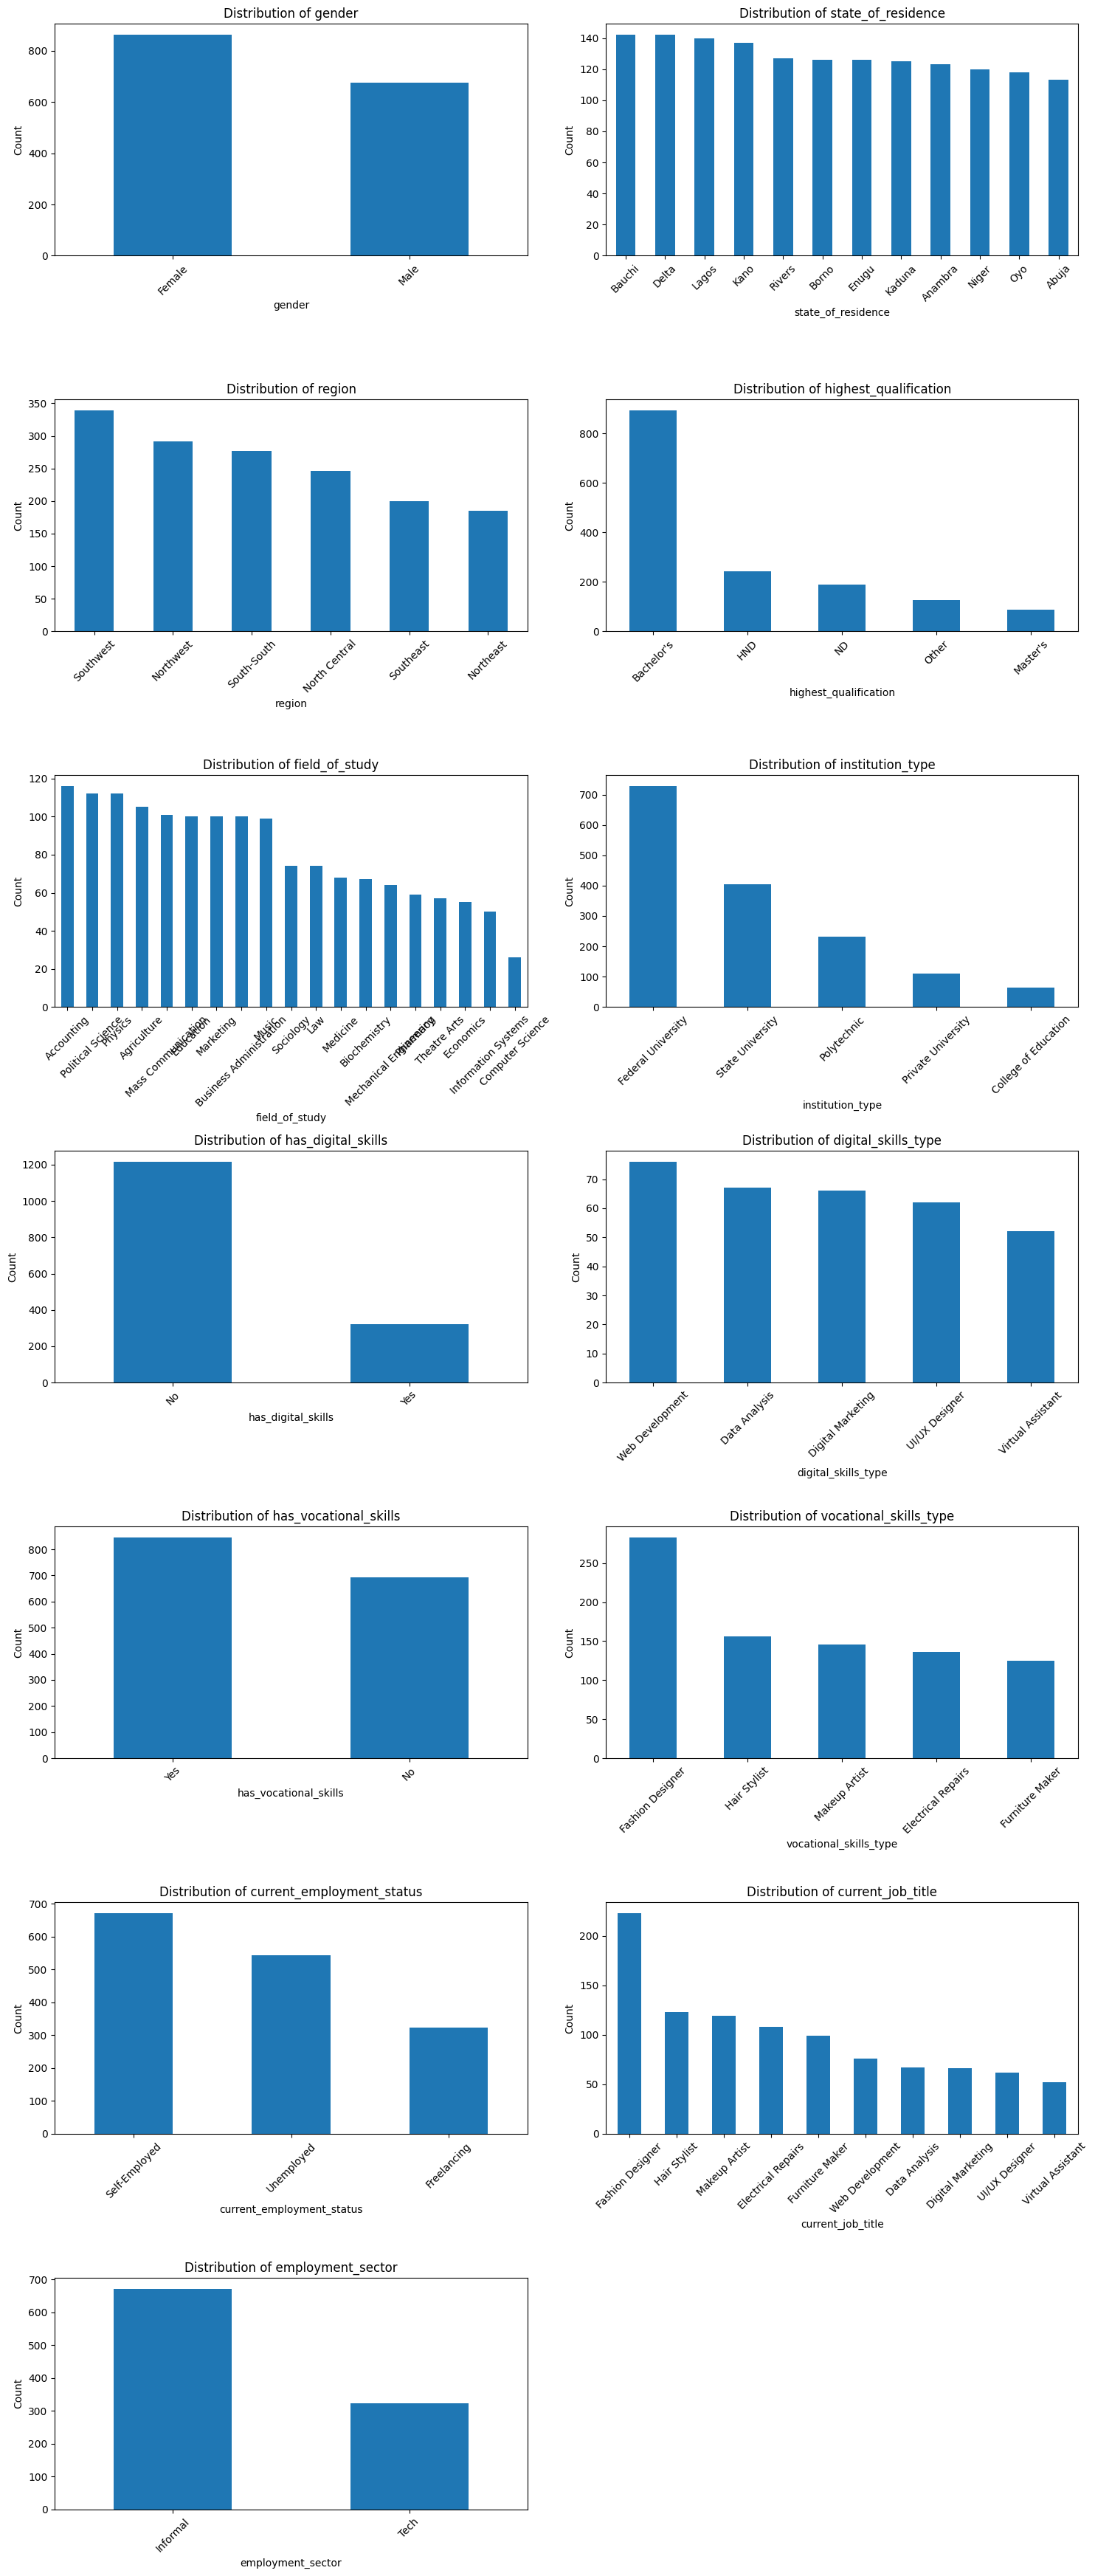

In [8]:
# Select categorical columns
df.drop(columns=["applicant_id", "full_name"], inplace=True)
categorical_cols = df.select_dtypes(include='object').columns

# Determine the number of rows needed for 2 charts per row
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a bar chart for each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

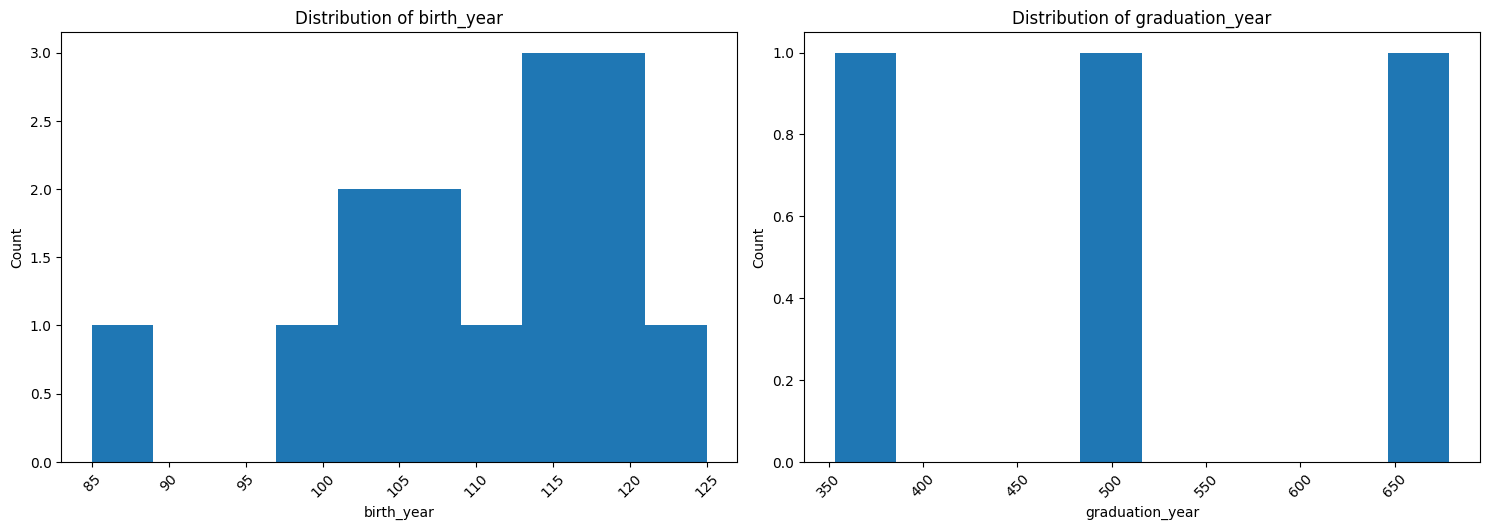

In [11]:
numerical_cols = df.select_dtypes(include='int').columns

# Determine the number of rows needed for 2 charts per row
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a bar chart for each categorical column
for i, col in enumerate(numerical_cols):
    df[col].value_counts().plot(kind='hist', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [46]:
region = [
    {"North Central": ["Benue", "Kogi", "Kwara","Nasarawa","Niger", "Plateau"]},
    {"North East": ["Adamawa","Bauchi","Borno", "Gombe", "Taraba", "Yobe"]},
    {"Nort West":["Jigawa", "Kaduna", "Kano", "Kastina", "Kebbi", "Sokoto","Zamfara"] },
    {"South East": ["Abia", "Anambra","Ebonyi" ,"Enugu", "Imo"]},
    {"South South": ["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers"]},
    {"South West": ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]}
]

def region_match(value):
    result = None
    for x, j in enumerate(region):
        if value in region[x].values():
            result = x

    return result

# print(region_match("Kogi"))
dir(region[0].values())

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'mapping']

In [35]:
for x, j in enumerate(region):
    print(x,j)

0 {'North Central': ['Benue', 'Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Plateau']}
1 {'North East': ['Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe']}
2 {'Nort West': ['Jigawa', 'Kaduna', 'Kano', 'Kastina', 'Kebbi', 'Sokoto', 'Zamfara']}
3 {'South East': ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']}
4 {'South South': ['Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers']}
5 {'South West': ['Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']}
